<h1>The Battle of Neighborhoods<h1>

<h2>1. Introduction<h2>

Objective: to figure out what kind of food in New Year City are popular as a part of point to attract more tourists.

   New York City is a big famous city in the worldwide, base on a lot of immigrate live in the city and make different food cart/restaurant in here, we want to make a project to analysis the number of that in different area and provide a report about taste in the city and how to attract more tourists visited.
    

<h2>2. Explanation of Data<h2>

The data shows different types of restaruant in New York City, and the fast food (included pizza, burger fast food, fried chicken restaruant)be the biggest number in different area and we aren't supriuse about that because same things happening in US nationalwide. 


Most data is taking from New York University Spatial Data Repository. There is the output json file link: https://geo.nyu.edu/catalog/nyu_2451_34572l; and also we take the data from Geopy Library too. 
 

If someone want to open a new restaruant, this data can be provide some suggestion for you; for example if you want open a Chinese food restaruant, you should be avoid some area which have a lot of Chinese restaurant because it will be make you harder to attract some customer from other restaurant. For example, in Arrochar, the Chinese food is the second popular in the list but it is 7th in Annadale. 

<h2>3. Data<h2>

In [83]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [4]:
import folium

In [5]:
!wget -q -O 'newyork_data.json' Explanation
print('Data downloaded!')

Data downloaded!


In [6]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [7]:
print ("newyork_data key and value's length are: ") 
for key, value in newyork_data.items(): 
    print (key, len(str(value)))

newyork_data key and value's length are: 
type 17
totalFeatures 3
features 124743
crs 70
bbox 74


In [8]:
neighborhoods_data = newyork_data['features']
pprint(neighborhoods_data[305])

{'geometry': {'coordinates': [-74.08173992211962, 40.61731079252983],
              'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.306',
 'properties': {'annoangle': 0.0,
                'annoline1': 'Fox',
                'annoline2': 'Hills',
                'annoline3': None,
                'bbox': [-74.08173992211962,
                         40.61731079252983,
                         -74.08173992211962,
                         40.61731079252983],
                'borough': 'Staten Island',
                'name': 'Fox Hills',
                'stacked': 2},
 'type': 'Feature'}


In [9]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [11]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [14]:
address = 'New York City, NY'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [15]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [16]:
CLIENT_ID = 'AT5C50MTJUNECDNJA2C3MFNQZCIRL2TCNPJYNSNTJ1XZBYW4' 
CLIENT_SECRET = 'VC2QFA1QM11CGVNQM2I3MBA34KL5NED1YKIGBWHCNZZBZJWG' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AT5C50MTJUNECDNJA2C3MFNQZCIRL2TCNPJYNSNTJ1XZBYW4
CLIENT_SECRET:VC2QFA1QM11CGVNQM2I3MBA34KL5NED1YKIGBWHCNZZBZJWG


In [17]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [18]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [19]:
category_list = category_results['response']['categories']

In [20]:
len(category_list)

10

In [21]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


In [22]:

def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [23]:
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

In [24]:
neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

In [25]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [26]:
LIMIT = 1 
radius = 500 
categoryId = '4d4b7105d754a06374d81259' 


url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/search?&client_id=AT5C50MTJUNECDNJA2C3MFNQZCIRL2TCNPJYNSNTJ1XZBYW4&client_secret=VC2QFA1QM11CGVNQM2I3MBA34KL5NED1YKIGBWHCNZZBZJWG&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&categoryId=4d4b7105d754a06374d81259&limit=1'

In [27]:
results = requests.get(url).json()

In [28]:
results['response']['venues']

[{'id': '4c783cef3badb1f7e4244b54',
  'name': 'Carvel Ice Cream',
  'location': {'address': '1006 E 233rd St',
   'lat': 40.890486685759605,
   'lng': -73.84856772568665,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.890486685759605,
     'lng': -73.84856772568665},
    {'label': 'entrance', 'lat': 40.890438, 'lng': -73.848559}],
   'distance': 483,
   'postalCode': '10466',
   'cc': 'US',
   'city': 'Bronx',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['1006 E 233rd St',
    'Bronx, NY 10466',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1c9941735',
    'name': 'Ice Cream Shop',
    'pluralName': 'Ice Cream Shops',
    'shortName': 'Ice Cream',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1588630591',
  'hasPerk': False}]

In [29]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

In [30]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [31]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incompelete information.
---Dataframe Created and Serialized---


In [32]:
print(nyc_venues.shape)

(13632, 7)


In [33]:
nyc_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Central Deli,40.896728,-73.844387,Deli / Bodega
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,Sandwich Place
3,Wakefield,40.894705,-73.847201,McDonald's,40.902645,-73.849485,Fast Food Restaurant
4,Wakefield,40.894705,-73.847201,Subway,40.897792,-73.855219,Sandwich Place


In [34]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 190 uniques categories.


Venue Category
Deli / Bodega                               1398
Pizza Place                                 1179
Coffee Shop                                  795
Fast Food Restaurant                         631
Chinese Restaurant                           618
Bakery                                       597
Donut Shop                                   568
Italian Restaurant                           457
Bagel Shop                                   406
Caribbean Restaurant                         394
Mexican Restaurant                           374
Fried Chicken Joint                          352
Café                                         320
American Restaurant                          317
Sandwich Place                               293
Food                                         245
Ice Cream Shop                               241
Diner                                        229
Restaurant                                   229
Burger Joint                                 204
Food 

In [35]:
unique_categories = nyc_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Deli / Bodega, Ice Cream Shop, Sandwich Place, Fast Food Restaurant, Caribbean Restaurant, Fried Chicken Joint, Food, Bakery, Chinese Restaurant, Pizza Place, Donut Shop, Steakhouse, Asian Restaurant, Burger Joint, Comfort Food Restaurant, Southern / Soul Food Restaurant, American Restaurant, Food Truck, Mexican Restaurant, Bagel Shop, Seafood Restaurant, Juice Bar, BBQ Joint, Italian Restaurant, Restaurant, Spanish Restaurant, Coffee Shop, Dessert Shop, Japanese Restaurant, Diner, Grocery Store, Wings Joint, Breakfast Spot, Café, Sushi Restaurant, Frozen Yogurt Shop, Bar, Vegetarian / Vegan Restaurant, Tapas Restaurant, Latin American Restaurant, Mediterranean Restaurant, Pub, Taco Place, Salvadoran Restaurant, Soup Place, Other Nightlife, Arcade, Food Court, Hot Dog Joint, Office, New American Restaurant, Health Food Store, French Restaurant, Convenience Store, Food & Drink Shop, Supermarket, Empanada Restaurant, African Restaurant, Cocktail Bar, Lounge, Vietnamese Restaurant, Paella

In [36]:
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [37]:
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

North Indian Restaurant, Motorcycle Shop, Varenyky restaurant, Belgian Restaurant, Steakhouse, Sushi Restaurant, Portuguese Restaurant, Moroccan Restaurant, Turkish Restaurant, African Restaurant, Szechuan Restaurant, Hong Kong Restaurant, Modern Greek Restaurant, Arepa Restaurant, Japanese Curry Restaurant, Yemeni Restaurant, Malay Restaurant, Taco Place, Filipino Restaurant, Toy / Game Store, Coworking Space, Lebanese Restaurant, Shanghai Restaurant, Kosher Restaurant, Vegetarian / Vegan Restaurant, Russian Restaurant, Bike Shop, Fast Food Restaurant, Chinese Restaurant, South American Restaurant, Tex-Mex Restaurant, Vietnamese Restaurant, Kebab Restaurant, Salvadoran Restaurant, Colombian Restaurant, Dim Sum Restaurant, Argentinian Restaurant, Thai Restaurant, Peruvian Restaurant, Tapas Restaurant, Halal Restaurant, Cuban Restaurant, Polish Restaurant, Burrito Place, Falafel Restaurant, Dumpling Restaurant, Modern European Restaurant, Brazilian Restaurant, Udon Restaurant, Asian Res

In [38]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].isin(food_categories)].reset_index()
nyc_venues.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3,Wakefield,40.894705,-73.847201,McDonald's,40.902645,-73.849485,Fast Food Restaurant
1,5,Wakefield,40.894705,-73.847201,Golden Krust Caribbean Restaurant,40.903773,-73.850051,Caribbean Restaurant
2,6,Wakefield,40.894705,-73.847201,Popeyes Louisiana Kitchen,40.889322,-73.843323,Fried Chicken Joint
3,9,Wakefield,40.894705,-73.847201,McDonald's,40.892779,-73.857473,Fast Food Restaurant
4,10,Wakefield,40.894705,-73.847201,Kennedy's Chicken & Pizza,40.886206,-73.848100,Fried Chicken Joint


In [39]:
print('There are {} unique FOOD categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 101 unique FOOD categories.


In [40]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

There are 3166 uniques venues.


In [41]:
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Beer Store,Belgian Restaurant,Bike Shop,Brazilian Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Colombian Restaurant,Coworking Space,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hobby Shop,Hong Kong Restaurant,Indian Restaurant,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,Motorcycle Shop,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Record Shop,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Turkish Restaurant,Udon Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
nyc_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Beer Store,Belgian Restaurant,Bike Shop,Brazilian Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Colombian Restaurant,Coworking Space,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hobby Shop,Hong Kong Restaurant,Indian Restaurant,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,Motorcycle Shop,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Record Shop,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Turkish Restaurant,Udon Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield


In [43]:
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Beer Store,Belgian Restaurant,Bike Shop,Brazilian Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Colombian Restaurant,Coworking Space,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hobby Shop,Hong Kong Restaurant,Indian Restaurant,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,Motorcycle Shop,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Record Shop,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Turkish Restaurant,Udon Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
nyc_onehot.shape

(6709, 102)

In [45]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(10)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Beer Store,Belgian Restaurant,Bike Shop,Brazilian Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Colombian Restaurant,Coworking Space,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hobby Shop,Hong Kong Restaurant,Indian Restaurant,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,Motorcycle Shop,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Record Shop,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Turkish Restaurant,Udon Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Arverne,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Astoria Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Auburndale,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [46]:
venue_counts_described = venue_counts.describe().transpose()

In [47]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Korean Restaurant,302.0,0.235099,1.555515,0.0,0.0,0.0,0.0,25.0
Caribbean Restaurant,302.0,1.304636,2.704723,0.0,0.0,0.0,1.0,15.0
Chinese Restaurant,302.0,2.046358,1.916315,0.0,1.0,2.0,3.0,14.0
Italian Restaurant,302.0,1.513245,1.776037,0.0,0.0,1.0,2.0,12.0
Pizza Place,302.0,3.903974,2.073576,0.0,2.0,4.0,5.0,11.0
Indian Restaurant,302.0,0.341060,0.964263,0.0,0.0,0.0,0.0,9.0
Fast Food Restaurant,302.0,2.089404,1.823241,0.0,1.0,2.0,3.0,9.0
Seafood Restaurant,302.0,0.430464,0.811135,0.0,0.0,0.0,1.0,8.0
Mexican Restaurant,302.0,1.238411,1.245369,0.0,0.0,1.0,2.0,7.0
Fried Chicken Joint,302.0,1.165563,1.418579,0.0,0.0,1.0,2.0,6.0


In [48]:
venue_top10_list = venue_top10.index.values.tolist()

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

<Figure size 2000x2000 with 10 Axes>

In [50]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Beer Store,Belgian Restaurant,Bike Shop,Brazilian Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Colombian Restaurant,Coworking Space,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hobby Shop,Hong Kong Restaurant,Indian Restaurant,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,Motorcycle Shop,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Record Shop,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Turkish Restaurant,Udon Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Allerton,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115385,0.0,0.192308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115385,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.269231,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.192308,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.157895,0.0,0.0,0.000000,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.105263,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.315789,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.105263,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.111111,0.0,0.0,0.055556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.222222,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [51]:
nyc_grouped.shape

(302, 102)

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [54]:
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

In [55]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Mexican Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
1,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,BBQ Joint,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
3,Arlington,Pizza Place,American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Spanish Restaurant,Polish Restaurant,Latin American Restaurant,Asian Restaurant,Chinese Restaurant,Fried Chicken Joint
4,Arrochar,Pizza Place,Chinese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Mediterranean Restaurant,Polish Restaurant,Taco Place,Italian Restaurant,Latin American Restaurant,Indoor Play Area


In [56]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

In [57]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

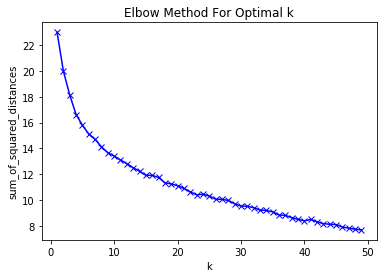

In [58]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [59]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

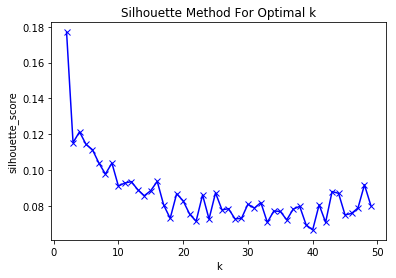

In [60]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [61]:
kclusters = 8

kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({1: 62, 7: 59, 5: 49, 2: 39, 0: 33, 6: 32, 3: 22, 4: 6})


In [62]:
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [63]:
neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Allerton,Mexican Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
1,2,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
2,2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,BBQ Joint,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
3,5,Arlington,Pizza Place,American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Spanish Restaurant,Polish Restaurant,Latin American Restaurant,Asian Restaurant,Chinese Restaurant,Fried Chicken Joint
4,2,Arrochar,Pizza Place,Chinese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Mediterranean Restaurant,Polish Restaurant,Taco Place,Italian Restaurant,Latin American Restaurant,Indoor Play Area
5,0,Arverne,Pizza Place,Chinese Restaurant,BBQ Joint,Caribbean Restaurant,American Restaurant,Taco Place,Asian Restaurant,Thai Restaurant,German Restaurant,Fried Chicken Joint
6,5,Astoria,Fast Food Restaurant,Greek Restaurant,Pizza Place,Ramen Restaurant,Italian Restaurant,Middle Eastern Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant
7,2,Astoria Heights,Pizza Place,Chinese Restaurant,Italian Restaurant,Greek Restaurant,Falafel Restaurant,Indian Restaurant,Middle Eastern Restaurant,Tapas Restaurant,French Restaurant,Fried Chicken Joint
8,7,Auburndale,Pizza Place,Korean Restaurant,Greek Restaurant,Chinese Restaurant,Italian Restaurant,Tapas Restaurant,Fast Food Restaurant,Fried Chicken Joint,Noodle House,Cantonese Restaurant
9,1,Bath Beach,Cantonese Restaurant,Fast Food Restaurant,Fried Chicken Joint,Chinese Restaurant,Pizza Place,Vietnamese Restaurant,Asian Restaurant,BBQ Joint,Shanghai Restaurant,Hong Kong Restaurant


In [64]:
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
nyc_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
0,0,Allerton,Mexican Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Bronx,40.865788,-73.859319
1,2,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Staten Island,40.538114,-74.178549
2,2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,BBQ Joint,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Staten Island,40.549286,-74.185887
3,5,Arlington,Pizza Place,American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Spanish Restaurant,Polish Restaurant,Latin American Restaurant,Asian Restaurant,Chinese Restaurant,Fried Chicken Joint,Staten Island,40.635325,-74.165104
4,2,Arrochar,Pizza Place,Chinese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Mediterranean Restaurant,Polish Restaurant,Taco Place,Italian Restaurant,Latin American Restaurant,Indoor Play Area,Staten Island,40.596313,-74.067124


In [65]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [66]:
required_column_indices = [2,3,7]
required_column = [list(nyc_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

In [67]:
cluster_0 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[1:12]]
cluster_0.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Mexican Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
5,Arverne,Pizza Place,Chinese Restaurant,BBQ Joint,Caribbean Restaurant,American Restaurant,Taco Place,Asian Restaurant,Thai Restaurant,German Restaurant,Fried Chicken Joint
13,Baychester,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Spanish Restaurant,American Restaurant,Italian Restaurant,BBQ Joint,Steakhouse,Seafood Restaurant
15,Bayswater,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Fried Chicken Joint,American Restaurant,Middle Eastern Restaurant,Caribbean Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
19,Bellaire,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Halal Restaurant,American Restaurant,Italian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Chocolate Shop,Spanish Restaurant
32,Broad Channel,Pizza Place,Chinese Restaurant,Yemeni Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant
37,Brownsville,Chinese Restaurant,Pizza Place,Caribbean Restaurant,Fried Chicken Joint,Seafood Restaurant,American Restaurant,Fast Food Restaurant,BBQ Joint,Southern / Soul Food Restaurant,Spanish Restaurant
85,Edgemere,Pizza Place,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,French Restaurant,Caribbean Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Fast Food Restaurant
93,Far Rockaway,Pizza Place,Chinese Restaurant,Caribbean Restaurant,Fried Chicken Joint,American Restaurant,Fast Food Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Yemeni Restaurant,German Restaurant
99,Floral Park,Indian Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Afghan Restaurant,Halal Restaurant,Pakistani Restaurant,Fried Chicken Joint,Greek Restaurant,New American Restaurant


In [68]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Chinese Restaurant    16
Pizza Place           15
Indian Restaurant      1
Mexican Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant      13
Pizza Place             11
Caribbean Restaurant     3
Fast Food Restaurant     2
Spanish Restaurant       1
Japanese Restaurant      1
Dim Sum Restaurant       1
American Restaurant      1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant           4
Taco Place                   4
American Restaurant          4
Mexican Restaurant           3
Fried Chicken Joint          3
Fast Food Restaurant         2
Caribbean Restaurant         2
BBQ Joint                    2
Halal Restaurant             1
Mediterranean Restaurant     1
Filipino Restaurant          1
Empanada Restaurant          1
Asian Restaurant             1
Indian Restaurant            1
Falafel Restaurant           1
Middle Eastern Restaurant    1
Japanese Res

In [69]:
cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[1:12]]
cluster_1.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Bath Beach,Cantonese Restaurant,Fast Food Restaurant,Fried Chicken Joint,Chinese Restaurant,Pizza Place,Vietnamese Restaurant,Asian Restaurant,BBQ Joint,Shanghai Restaurant,Hong Kong Restaurant
17,Bedford Stuyvesant,Fried Chicken Joint,Fast Food Restaurant,Pizza Place,Caribbean Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,Cuban Restaurant,Brazilian Restaurant,New American Restaurant,French Restaurant
30,Briarwood,Fast Food Restaurant,Pizza Place,Fried Chicken Joint,Latin American Restaurant,Japanese Restaurant,South American Restaurant,Middle Eastern Restaurant,Southern / Soul Food Restaurant,Chinese Restaurant,Sushi Restaurant
31,Brighton Beach,Eastern European Restaurant,Russian Restaurant,Seafood Restaurant,Fast Food Restaurant,Fried Chicken Joint,Pizza Place,Mediterranean Restaurant,Chinese Restaurant,Taco Place,Sushi Restaurant
33,Broadway Junction,Pizza Place,Fried Chicken Joint,Mexican Restaurant,Fast Food Restaurant,Caribbean Restaurant,Chinese Restaurant,African Restaurant,Japanese Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant
39,Bushwick,Pizza Place,Fried Chicken Joint,Fast Food Restaurant,Mexican Restaurant,Thai Restaurant,Korean Restaurant,Latin American Restaurant,Pakistani Restaurant,Peruvian Restaurant,Seafood Restaurant
52,City Line,Fast Food Restaurant,Fried Chicken Joint,Chinese Restaurant,Pizza Place,Caribbean Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,BBQ Joint,Asian Restaurant,Latin American Restaurant
54,Claremont Village,Fast Food Restaurant,Pizza Place,Spanish Restaurant,Seafood Restaurant,Mexican Restaurant,Chinese Restaurant,Caribbean Restaurant,Fried Chicken Joint,African Restaurant,Latin American Restaurant
57,Clinton,Fast Food Restaurant,Mexican Restaurant,Seafood Restaurant,Sushi Restaurant,Taco Place,Filipino Restaurant,Pizza Place,Empanada Restaurant,American Restaurant,Peruvian Restaurant
59,Co-op City,Fast Food Restaurant,Caribbean Restaurant,Chinese Restaurant,Pizza Place,American Restaurant,Spanish Restaurant,Fried Chicken Joint,BBQ Joint,Italian Restaurant,Mexican Restaurant


In [70]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant           28
Pizza Place                    12
Fried Chicken Joint             6
Caribbean Restaurant            4
American Restaurant             3
Chinese Restaurant              3
Indian Restaurant               2
Mexican Restaurant              1
Cantonese Restaurant            1
Eastern European Restaurant     1
Latin American Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place                  16
Fried Chicken Joint          12
Fast Food Restaurant         10
Mexican Restaurant            7
Chinese Restaurant            4
Caribbean Restaurant          3
Korean Restaurant             2
American Restaurant           2
South American Restaurant     1
Thai Restaurant               1
French Restaurant             1
Russian Restaurant            1
Indian Restaurant             1
Middle Eastern Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Ch

In [71]:
cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[1:12]]
cluster_2.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,BBQ Joint,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
4,Arrochar,Pizza Place,Chinese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Mediterranean Restaurant,Polish Restaurant,Taco Place,Italian Restaurant,Latin American Restaurant,Indoor Play Area
7,Astoria Heights,Pizza Place,Chinese Restaurant,Italian Restaurant,Greek Restaurant,Falafel Restaurant,Indian Restaurant,Middle Eastern Restaurant,Tapas Restaurant,French Restaurant,Fried Chicken Joint
21,Bellerose,Pizza Place,Indian Restaurant,Halal Restaurant,American Restaurant,Chinese Restaurant,BBQ Joint,Fried Chicken Joint,Italian Restaurant,Seafood Restaurant,Fast Food Restaurant
26,Bloomfield,Pizza Place,Italian Restaurant,Mexican Restaurant,BBQ Joint,Yemeni Restaurant,Greek Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
34,Bronxdale,Pizza Place,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Yemeni Restaurant,Spanish Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Seafood Restaurant,Fast Food Restaurant
38,Bulls Head,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant,Burrito Place,Sri Lankan Restaurant,Indian Restaurant,Tex-Mex Restaurant,Sushi Restaurant
46,Castleton Corners,Pizza Place,Chinese Restaurant,American Restaurant,Italian Restaurant,Sushi Restaurant,Halal Restaurant,Japanese Restaurant,Fast Food Restaurant,Thai Restaurant,Chocolate Shop
56,Clifton,Pizza Place,Mexican Restaurant,Spanish Restaurant,Italian Restaurant,Filipino Restaurant,Chinese Restaurant,New American Restaurant,Sri Lankan Restaurant,Cajun / Creole Restaurant,African Restaurant


In [72]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place           38
Italian Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant     13
Chinese Restaurant      9
American Restaurant     5
Mexican Restaurant      2
Sushi Restaurant        2
Japanese Restaurant     2
BBQ Joint               1
Asian Restaurant        1
Indian Restaurant       1
Spanish Restaurant      1
Taco Place              1
Kosher Restaurant       1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Greek Restaurant                   4
American Restaurant                4
Italian Restaurant                 3
Chinese Restaurant                 3
Thai Restaurant                    2
Indian Restaurant                  2
Fast Food Restaurant               2
Vietnamese Restaurant              2
Halal Restaurant                   2
Pakistani Restaurant               2
Middle Eastern Restaurant          1
Polish Restaurant                  1
Coworking Space   

In [73]:
cluster_3 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[1:12]]
cluster_3.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Brookville,Fried Chicken Joint,Caribbean Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,New American Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Filipino Restaurant
41,Cambria Heights,Caribbean Restaurant,Fried Chicken Joint,Chinese Restaurant,Seafood Restaurant,African Restaurant,Pizza Place,Fast Food Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant
42,Canarsie,Caribbean Restaurant,Chinese Restaurant,Pizza Place,Fast Food Restaurant,African Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Taco Place,Yemeni Restaurant,Greek Restaurant
68,Crown Heights,Caribbean Restaurant,Southern / Soul Food Restaurant,Fast Food Restaurant,Fried Chicken Joint,Pizza Place,Vietnamese Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant


In [74]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Caribbean Restaurant    21
Fried Chicken Joint      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place                        8
Fast Food Restaurant               4
Chinese Restaurant                 4
Fried Chicken Joint                2
Southern / Soul Food Restaurant    1
Caribbean Restaurant               1
American Restaurant                1
Seafood Restaurant                 1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant                4
Mexican Restaurant                 3
New American Restaurant            2
Fast Food Restaurant               2
Fried Chicken Joint                2
Vegetarian / Vegan Restaurant      2
Southern / Soul Food Restaurant    1
Vietnamese Restaurant              1
Taco Place                         1
Seafood Restaurant                 1
Steakhouse                         1
Thai Restaurant                    1
Pizza Place                   

In [75]:
cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[1:12]]
cluster_4.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Beechhurst,Italian Restaurant,Pizza Place,Japanese Restaurant,Vietnamese Restaurant,Chinese Restaurant,South American Restaurant,Taco Place,Caribbean Restaurant,Spanish Restaurant,Yemeni Restaurant
40,Butler Manor,Italian Restaurant,Asian Restaurant,BBQ Joint,Chinese Restaurant,Fried Chicken Joint,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
152,Lighthouse Hill,Italian Restaurant,Yemeni Restaurant,Halal Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant
230,Richmond Town,Italian Restaurant,Pizza Place,Asian Restaurant,Mexican Restaurant,American Restaurant,Japanese Restaurant,Fast Food Restaurant,Spanish Restaurant,Yemeni Restaurant,Greek Restaurant
271,Tottenville,Italian Restaurant,Mexican Restaurant,Pizza Place,Asian Restaurant,Chinese Restaurant,American Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Fast Food Restaurant
272,Travis,Pizza Place,Italian Restaurant,Spanish Restaurant,Steakhouse,Yemeni Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant


In [76]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    5
Pizza Place           1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place           2
Asian Restaurant      1
Yemeni Restaurant     1
Italian Restaurant    1
Mexican Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
South American Restaurant    1
German Restaurant            1
Yemeni Restaurant            1
American Restaurant          1
Japanese Restaurant          1
Falafel Restaurant           1
Name: 6th Most Common Venue, dtype: int64
---------------------------------------------


In [77]:
cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[1:12]]
cluster_5.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Arlington,Pizza Place,American Restaurant,Peruvian Restaurant,Fast Food Restaurant,Spanish Restaurant,Polish Restaurant,Latin American Restaurant,Asian Restaurant,Chinese Restaurant,Fried Chicken Joint
6,Astoria,Fast Food Restaurant,Greek Restaurant,Pizza Place,Ramen Restaurant,Italian Restaurant,Middle Eastern Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant
10,Battery Park City,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Italian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Taco Place,Chinese Restaurant,Steakhouse,American Restaurant
11,Bay Ridge,Pizza Place,Fast Food Restaurant,Middle Eastern Restaurant,Mexican Restaurant,American Restaurant,Turkish Restaurant,Fried Chicken Joint,Yemeni Restaurant,Steakhouse,Greek Restaurant
16,Bedford Park,Pizza Place,Fried Chicken Joint,Fast Food Restaurant,Chinese Restaurant,Mexican Restaurant,Salvadoran Restaurant,Seafood Restaurant,Spanish Restaurant,Caribbean Restaurant,Yemeni Restaurant
22,Belmont,Italian Restaurant,Pizza Place,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Latin American Restaurant,Fried Chicken Joint,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant
27,Boerum Hill,Pizza Place,Fast Food Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,BBQ Joint,French Restaurant,Yemeni Restaurant,Greek Restaurant
28,Borough Park,Pizza Place,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Mexican Restaurant,Caucasian Restaurant,Steakhouse,Yemeni Restaurant,German Restaurant,English Restaurant
43,Carnegie Hill,Fast Food Restaurant,Pizza Place,American Restaurant,Mexican Restaurant,BBQ Joint,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Filipino Restaurant,Food Service
65,Coney Island,Pizza Place,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Latin American Restaurant,Caribbean Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Filipino Restaurant


In [78]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place             40
Fast Food Restaurant     6
Italian Restaurant       2
Mexican Restaurant       1
Taco Place               1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant             18
Pizza Place                       9
Chinese Restaurant                4
American Restaurant               4
Mexican Restaurant                4
Italian Restaurant                2
Greek Restaurant                  2
Eastern European Restaurant       1
Vegetarian / Vegan Restaurant     1
Caribbean Restaurant              1
Spanish Restaurant                1
Japanese Restaurant               1
BBQ Joint                         1
Fried Chicken Joint               1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant           6
Fried Chicken Joint          6
Mexican Restaurant           6
Turkish Restaurant           3
Indian Restaurant            3
Italian Restaurant           3

In [79]:
cluster_6 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[1:12]]
cluster_6.head(10
              )

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Breezy Point,American Restaurant,Pizza Place,Yemeni Restaurant,Halal Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant
35,Brooklyn Heights,Pizza Place,Ramen Restaurant,American Restaurant,Mexican Restaurant,Japanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant,Fried Chicken Joint,Greek Restaurant
44,Carroll Gardens,Pizza Place,Ramen Restaurant,BBQ Joint,Record Shop,Seafood Restaurant,French Restaurant,Taco Place,Mexican Restaurant,Japanese Restaurant,American Restaurant
45,Castle Hill,Pizza Place,Spanish Restaurant,Caribbean Restaurant,Southern / Soul Food Restaurant,American Restaurant,Fried Chicken Joint,Fast Food Restaurant,Mexican Restaurant,Cuban Restaurant,Italian Restaurant
47,Central Harlem,Fried Chicken Joint,Pizza Place,Southern / Soul Food Restaurant,Seafood Restaurant,Italian Restaurant,Caribbean Restaurant,Mediterranean Restaurant,Ramen Restaurant,Japanese Curry Restaurant,Arepa Restaurant
55,Clason Point,American Restaurant,Seafood Restaurant,South American Restaurant,Yemeni Restaurant,Greek Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
60,Cobble Hill,Mexican Restaurant,Ramen Restaurant,Japanese Restaurant,American Restaurant,Pizza Place,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant,Fried Chicken Joint,Greek Restaurant
74,Dumbo,Pizza Place,Mexican Restaurant,Italian Restaurant,American Restaurant,Ramen Restaurant,Taco Place,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,New American Restaurant
76,East Elmhurst,Pizza Place,Caribbean Restaurant,South American Restaurant,Mexican Restaurant,American Restaurant,Latin American Restaurant,Seafood Restaurant,Chinese Restaurant,Steakhouse,Colombian Restaurant
107,Fresh Meadows,Pizza Place,Japanese Restaurant,American Restaurant,Italian Restaurant,Falafel Restaurant,Mexican Restaurant,Thai Restaurant,Chinese Restaurant,Kosher Restaurant,Greek Restaurant


In [80]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place            22
American Restaurant     7
Seafood Restaurant      1
Mexican Restaurant      1
Fried Chicken Joint     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place                    6
American Restaurant            6
Ramen Restaurant               5
Italian Restaurant             3
Mediterranean Restaurant       2
Japanese Restaurant            2
Mexican Restaurant             2
Eastern European Restaurant    1
Seafood Restaurant             1
Taco Place                     1
Thai Restaurant                1
Caribbean Restaurant           1
Spanish Restaurant             1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Taco Place                   3
Caribbean Restaurant         2
Chinese Restaurant           2
Seafood Restaurant           2
Latin American Restaurant    2
Falafel Restaurant           2
Fast Food Restaurant         2
Mediterranean Restaurant     2
Mexican Restauran

In [81]:
cluster_7 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 7, nyc_merged.columns[1:12]]
cluster_7.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Auburndale,Pizza Place,Korean Restaurant,Greek Restaurant,Chinese Restaurant,Italian Restaurant,Tapas Restaurant,Fast Food Restaurant,Fried Chicken Joint,Noodle House,Cantonese Restaurant
12,Bay Terrace,Italian Restaurant,Pizza Place,Asian Restaurant,American Restaurant,Chinese Restaurant,Mexican Restaurant,Indian Restaurant,Steakhouse,Spanish Restaurant,Falafel Restaurant
12,Bay Terrace,Italian Restaurant,Pizza Place,Asian Restaurant,American Restaurant,Chinese Restaurant,Mexican Restaurant,Indian Restaurant,Steakhouse,Spanish Restaurant,Falafel Restaurant
14,Bayside,Pizza Place,Korean Restaurant,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Thai Restaurant,Japanese Restaurant,Fried Chicken Joint,Greek Restaurant,Spanish Restaurant
20,Belle Harbor,Seafood Restaurant,Italian Restaurant,Mexican Restaurant,BBQ Joint,Chinese Restaurant,Yemeni Restaurant,Greek Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant
23,Bensonhurst,Chinese Restaurant,Cantonese Restaurant,Pizza Place,Asian Restaurant,Sushi Restaurant,Fried Chicken Joint,Italian Restaurant,Turkish Restaurant,Mexican Restaurant,Shabu-Shabu Restaurant
24,Bergen Beach,Sushi Restaurant,Pizza Place,Middle Eastern Restaurant,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,American Restaurant,Italian Restaurant,Peruvian Restaurant,Moroccan Restaurant
25,Blissville,Pizza Place,Chinese Restaurant,Mexican Restaurant,Italian Restaurant,Fast Food Restaurant,South American Restaurant,Sushi Restaurant,American Restaurant,Turkish Restaurant,Latin American Restaurant
48,Charleston,Italian Restaurant,Pizza Place,Fast Food Restaurant,Steakhouse,Japanese Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Seafood Restaurant,Falafel Restaurant,Modern European Restaurant
49,Chelsea,Italian Restaurant,Fast Food Restaurant,BBQ Joint,Pizza Place,American Restaurant,Spanish Restaurant,Steakhouse,Mexican Restaurant,Japanese Restaurant,Taco Place


In [84]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant             24
Pizza Place                    16
Sushi Restaurant                5
Korean Restaurant               3
Mexican Restaurant              3
Seafood Restaurant              2
Chinese Restaurant              2
Japanese Restaurant             2
Asian Restaurant                1
Fast Food Restaurant            1
Indian Restaurant               1
Spanish Restaurant              1
Eastern European Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place                      15
Italian Restaurant               14
Chinese Restaurant                7
Sushi Restaurant                  5
Fast Food Restaurant              4
Mexican Restaurant                3
American Restaurant               3
Korean Restaurant                 2
New American Restaurant           2
Thai Restaurant                   2
Vegetarian / Vegan Restaurant     1
Cantonese Restaurant              1
Asian Restaurant                  1
Mi

<h2>4. Result and Discussion<h2>

Deli, Pizza, Coffee and fast food become the most popular four types of restaurant in NYC, not only about the US background but also those kind of food didn't need to spent to much time to eat or make; but we can't ignore other type food such as Chinese food; it has a lot of restaruant in different area of New York City. 

There have a lot of object can be discussion in the future:
    1. The budget to open a restaruant in the NYC
    2. How the situation of NYC restaurant's owner under Covid-19?
    3. The background of culture (with different immigration)relationship with owner?

<h2>5. Conclusion <h2>

This project shows the popular food in NYC's different area, of course similar as US nationalwide, the fast food always be the 1st popular. And we can't ignore other types of food in NYC, such as Greek, Mexican, Korean and Chinese food. And those result is relationship with different race in New York City. As in italian town, the itlian resturant be the biggest number and Chinese food of course, always be the most popular in Chinatown. 

In those different fast food, pizza become the most popular one in fast food category in generally, but other food show their advantage in their own area.  